In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pa
import seaborn as sb
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [3]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

file = 'data/filldata_reason.csv'
path = 'site/'
d = pa.read_csv('data/NCAANDS.csv',encoding='ISO-8859-1')

st = pa.DataFrame(d['St'].value_counts()).rename_axis('Cd')

In [4]:
data = pa.read_csv(file)

In [5]:
import datetime as dt
pa.to_datetime('2019-08-01')-pa.to_datetime(d['DOB'])

0        2724 days
1        4673 days
2         716 days
3        2146 days
4        1325 days
            ...   
691183   4856 days
691184   4461 days
691185   5677 days
691186   2664 days
691187   7047 days
Name: DOB, Length: 691188, dtype: timedelta64[ns]

In [6]:
len(d[d['SEX']==1.0]['SEX'])/len(d['SEX']) * 100

51.56585473127427

## Gender 

In [7]:
gender = pa.DataFrame(d['SEX'].value_counts()).reset_index().rename(columns={'index':'Gender'})
gender['Gender'][0] = 'Male'
gender['Gender'][1] = 'Female'
labels = gender['Gender'].to_list()
values = gender['SEX'].to_list()
fig = go.Figure(data=[go.Bar(x=labels, y=values)])
fig.update_layout(title="Gender ratio of the dataset")
fig.write_html(path+'child-gender.html')
fig.show()

In [8]:
# d[['St','SEX','AMIAKN','ASIAN','BLKAFRAM','HAWAIIPI','WHITE','UNTODETM','HISORGIN']]

In [9]:
lab=['NotAdpt','Adpt','Unknow']
val=d['EVERADPT'].value_counts().to_list()
fig = go.Figure(data=[go.Pie(labels=lab, values=val)])
fig.update_layout(
    title="Total Children Adopted")
fig.write_html(path+'Ever-adpt.html')
fig.show()

In [10]:
# d[(d['St']=='AL')]['EVERADPT'].value_counts()

In [7]:
s_sx=list()
m=list()
f=list()
ct=[]

for i in states:
    x = d[d['St'].isin([i])]
    ct.append(len(x))
    x=x['SEX'].value_counts().tolist()
    s_sx.append(i)
    m.append(x[0] if len(x)>1 else 0)
    f.append(x[1] if len(x) > 1 else 0)

ix=[]
ami=[]
asi=[]
blk=[]
haw=[]
whi=[]
unt=[]
his=[]
for i in states:
    x = d[d['St'].isin([i])]
    ix.append(i)
    temp = x['AMIAKN'].value_counts().tolist()
    ami.append(temp[1] if len(temp)>1 else 0)
    temp = x['ASIAN'].value_counts().tolist()
    asi.append(temp[1] if len(temp)>1 else 0)
    temp = x['BLKAFRAM'].value_counts().tolist()
    blk.append(temp[1] if len(temp)>1 else 0)
    temp = x['HAWAIIPI'].value_counts().tolist()
    haw.append(temp[1] if len(temp)>1 else 0)
    temp = x['WHITE'].value_counts().tolist()
    whi.append(temp[1] if len(temp)>1 else 0)
    temp = x['UNTODETM'].value_counts().tolist()
    unt.append(temp[1] if len(temp)>1 else 0)
    temp = x['HISORGIN'].value_counts().tolist()
    his.append(temp[1] if len(temp)>1 else 0)
    

# 'AMIAKN','ASIAN','BLKAFRAM','HAWAIIPI','WHITE','UNTODETM','HISORGIN'

# USA.head(10)

USA = pa.DataFrame([s_sx,m,f,ct,ami,asi,blk,haw,whi,unt,his]).T.rename(
    columns={0:'St',1:'Male',2:'Female',3:'Children',4:'AMIAKN',5:'ASIAN',6:'BLKAFRAM',7:'HAWAIIPI',8:'WHITE',9:"UNTODETM",10:'HISORGIN'})

# USA['Male']=(USA['Male']/USA['Children'] *100)
# USA['Female']=(100-USA['Male'])
# USA['Male']=USA['Male']
# USA['Female']=USA['Female']

USA['C-Pers']=((USA['Children']/USA['Children'].sum()).astype(float) * 100).round(2)
USA['txt'] = 'State:'+USA['St'].astype(str)+'<br>Male:'+USA['Male'].astype(str)+'<br>'+'Female:'+USA['Female'].astype(str)
xtemp=USA.copy()
firstd = [dict(
                type='choropleth',locations=USA['St'],z=USA['C-Pers'],locationmode='USA-states',text=USA['txt'],autocolorscale=True,colorbar=dict(title='Children')
            )]

layout=dict(title='Persentage Of Children in Each State',
            geo=dict(scope='usa',
                     projection=dict(type='albers usa'),
                     showlakes=True,
                     lakecolor='rgb(66,165,245)'
                    ),
           )

fig=dict(data=firstd,layout=layout)
fig=go.Figure(fig)
fig.show()
fig.write_html(path+'child-stmap.html')
childcount = USA['Children'].copy()

In [12]:
USA[['AMIAKN','ASIAN','BLKAFRAM','HAWAIIPI','WHITE','UNTODETM','HISORGIN']].sum()
labels=USA[['AMIAKN','ASIAN','BLKAFRAM','HAWAIIPI','WHITE','UNTODETM','HISORGIN']].sum().index
values=USA[['AMIAKN','ASIAN','BLKAFRAM','HAWAIIPI','WHITE','UNTODETM','HISORGIN']].sum().tolist()
fig = go.Figure(data=[go.Pie(labels=labels, values=values,title='Persentage of Race of All the Children')])
fig.write_html(path+'child-race.html')
fig.show()

## Adopted Children in Each State.

In [8]:
newd=d[d['EVERADPT'].isin([3.0])]
s_sx=list()
m=list()
f=list()
ct=[]

for i in states:
    x = newd[newd['St'].isin([i])]
    ct.append(len(x))
    x=x['SEX'].value_counts().tolist()
    s_sx.append(i)
    m.append(x[0] if len(x)>1 else 0)
    f.append(x[1] if len(x)>1 else 0)

ix=[]
ami=[]
asi=[]
blk=[]
haw=[]
whi=[]
unt=[]
his=[]
for i in states:
    x = d[d['St'].isin([i])]
    ix.append(i)
    temp = x['AMIAKN'].value_counts().tolist()
    ami.append(temp[1] if len(temp)>1 else 0)
    temp = x['ASIAN'].value_counts().tolist()
    asi.append(temp[1] if len(temp)>1 else 0)
    temp = x['BLKAFRAM'].value_counts().tolist()
    blk.append(temp[1] if len(temp)>1 else 0)
    temp = x['HAWAIIPI'].value_counts().tolist()
    haw.append(temp[1] if len(temp)>1 else 0)
    temp = x['WHITE'].value_counts().tolist()
    whi.append(temp[1] if len(temp)>1 else 0)
    temp = x['UNTODETM'].value_counts().tolist()
    unt.append(temp[1] if len(temp)>1 else 0)
    temp = x['HISORGIN'].value_counts().tolist()
    his.append(temp[1] if len(temp)>1 else 0)
    

# 'AMIAKN','ASIAN','BLKAFRAM','HAWAIIPI','WHITE','UNTODETM','HISORGIN'

# USA.head(10)

USA = pa.DataFrame([s_sx,m,f,ct,ami,asi,blk,haw,whi,unt,his]).T.rename(
    columns={0:'St',1:'Male',2:'Female',3:'Children',4:'AMIAKN',5:'ASIAN',6:'BLKAFRAM',7:'HAWAIIPI',8:'WHITE',9:"UNTODETM",10:'HISORGIN'})

# USA['Male']=(USA['Male']/USA['Children'] *100)
# USA['Female']=(100-USA['Male'])
# USA['Male']=USA['Male']
# USA['Female']=USA['Female']

USA['Apt-Pers'] = (USA['Children']/childcount * 100).astype(float).round(2)
USA['txt'] = 'State:'+USA['St'].astype(str)+'<br>Male:'+USA['Male'].astype(str)+'<br>'+'Female:'+USA['Female'].astype(str)+''

firstd = [dict(
                type='choropleth',locations=USA['St'],z=USA['Apt-Pers'],locationmode='USA-states',text=USA['txt'],autocolorscale=True,colorbar=dict(title='Children')
            )]

layout=dict(title='Adoption Rate in Each State',
            geo=dict(scope='usa',
                     projection=dict(type='albers usa'),
                     showlakes=True,
                     lakecolor='rgb(66,165,245)'
                    ),
           )

fig=dict(data=firstd,layout=layout)
fig=go.Figure(fig)
# fig.layout.xaxis.fixedrange = False
# fig.layout.yaxis.fixedrange = False
fig.show()
fig.write_html(path+'Adopt-stmap.html')

# fig

In [14]:
USA[['AMIAKN','ASIAN','BLKAFRAM','HAWAIIPI','WHITE','UNTODETM','HISORGIN']].sum()
labels=['American Indian or Alaska Native','Asian ','Black/African American','Hawaiian or Other Pacific Islander','White','UNTODETM','Hispanic Origin']
values=USA[['AMIAKN','ASIAN','BLKAFRAM','HAWAIIPI','WHITE','UNTODETM','HISORGIN']].sum().tolist()
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title="Ethinic Divirsity ")
fig.write_html(path+'adopt-race.html')
fig.show()

In [15]:
i = d[['CLINDIS', 'MR', 'VISHEAR', 'PHYDIS', 'EmotDist', 'OTHERMED']].isin([1.0])

In [16]:
medic = len(d[i['CLINDIS'] | i['MR'] | i['VISHEAR'] | i['PHYDIS'] | i['EmotDist'] | i['OTHERMED']]['RecNumbr'])

In [17]:
medic

151676

In [18]:
GenSt=d[i['CLINDIS'] | i['MR'] | i['VISHEAR'] | i['PHYDIS'] | i['EmotDist'] | i['OTHERMED']][['SEX','St']]

In [19]:
fig = go.Figure(data=[go.Pie(labels=['Male','Female'], values=GenSt['SEX'].value_counts().to_list())])
fig.update_layout(
    title="Disability Gender ratio")
fig.write_html(path+'disb-gender.html')
fig.show()

## Disabilites according to state wise

In [53]:
xtemp = xtemp[['St','Children']].set_index('St')

In [55]:
xtemp['dis-children'] = GenSt['St'].value_counts()

In [63]:
xtemp['Children'] = xtemp['Children']-xtemp['dis-children']

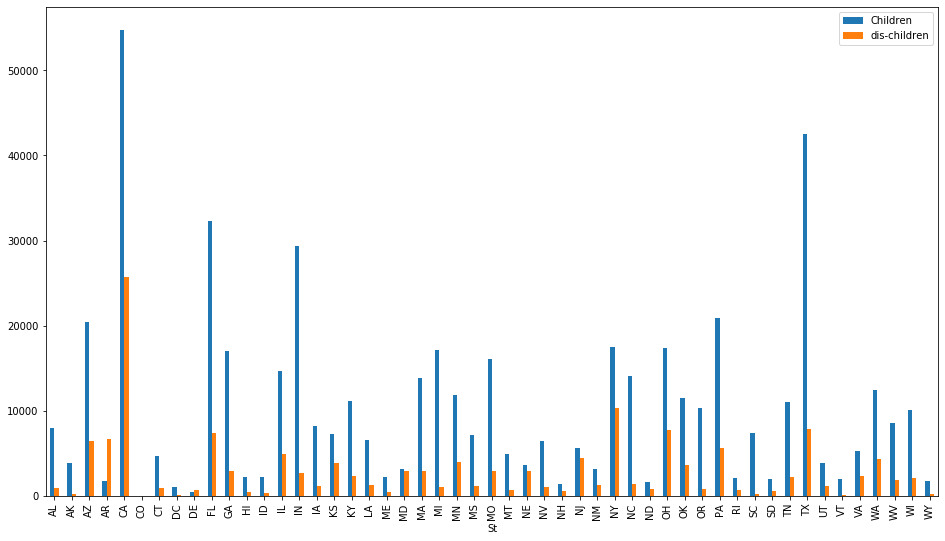

In [73]:
xtemp.plot(kind='bar',figsize=(16,9))

In [70]:
# # xtemp
# import plotly.express as px
# px.bar(df, x=xtemp.index, y="total_bill", color='time')

In [69]:

lable = GenSt['St'].value_counts().index
values = GenSt['St'].value_counts().to_list()
fig = go.Figure(data=[go.Bar(x=lable, y=values)])
fig.update_layout(title="Disability numbers State wise")
fig.write_html(path+'disb-states.html')
fig.show()

## Disability ratio in the entire dataset 

In [21]:
labs = ['With out Disabilites','With Disabilites']
values=[len(d['RecNumbr'])-medic,medic]
fig= go.Figure(data=[go.Pie(labels=labs, values=values,title="Disability Ratio")])
fig.write_html(path+'disb-overall.html')
fig.show()
values

[539512, 151676]

## Disabilites types 

In [22]:
labels = ['Clinically Diagnosed Disability', 'Mental Retardation', 'Visually or Hearing Impaired', 'Physically Disabled', 'Emotionally Disturbed', ' Medically Diagnosed Condition Requiring Special Care']
values = [i['CLINDIS'].value_counts()[1],i['MR'].value_counts()[1],i['VISHEAR'].value_counts()[1],i['PHYDIS'].value_counts()[1],i['EmotDist'].value_counts()[1],i['OTHERMED'].value_counts()[1]]
fig = go.Figure(data=[go.Pie(labels=labels, values=values,title="Disabilites of 355k Children")])
fig.write_html(path+'disb-ration.html')
fig.show()
